In [1]:
import pandas as pd
from datetime import datetime, timedelta
import datetime as dt
import numpy as np 
import yfinance as yf
import pandas_datareader as web
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
scaler = StandardScaler()

In [2]:
#MSFT = yf.download("MSFT", start="2012-01-01", end="2020-11-29")

#NFLX = yf.download("NFLX", start="2012-01-01", end="2020-11-29")

#AMZN = yf.download("AMZN", start="2012-01-01", end="2020-11-29")

#AAPL = yf.download("AAPL", start="2012-01-01", end="2020-11-29")

#TSLA = yf.download("TSLA", start="2012-01-01", end="2020-11-29")

In [3]:
stock_data = pd.read_csv('/Users/aamirsayani/Downloads/tsla_earnings.csv')

In [4]:
stock_data.head()

stock_data.info()

stock_data.columns = [c.replace(' ', '_') for c in stock_data.columns]

stock_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date Announced      35 non-null     object 
 1   Timeframe           35 non-null     object 
 2   Name                35 non-null     object 
 3   Symbol              35 non-null     object 
 4   Period              35 non-null     object 
 5   Confirmed Date      35 non-null     object 
 6   EPS                 34 non-null     float64
 7   Estimated EPS       33 non-null     float64
 8   Surprise % EPS      31 non-null     float64
 9   Revenue             34 non-null     float64
 10  Estimated Revenue   33 non-null     float64
 11  Surprise % Revenue  33 non-null     float64
dtypes: float64(6), object(6)
memory usage: 3.4+ KB


,Date_Announced,Timeframe,Name,Symbol,Period,Confirmed_Date,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue
30,1/29/20,After Market Close,Tesla,TSLA,Q4,Confirmed,2.14,1.72,24.418605,7.384000e+09,7.020000e+09,5.185185
31,4/29/20,After Market Close,Tesla,TSLA,Q1,Confirmed,1.14,-0.36,416.666667,5.985000e+09,5.900000e+09,1.440678
32,7/22/20,After Market Close,Tesla,TSLA,Q2,Confirmed,2.18,-0.11,2081.818182,6.036000e+09,5.230000e+09,15.411090
33,10/21/20,After Market Close,Tesla,TSLA,Q3,Confirmed,0.76,0.56,35.714286,8.771000e+09,8.260000e+09,6.186441
34,1/27/21,After Market Close,Tesla,TSLA,Q4,Unconfirmed,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
stock_data.fillna(0)

clean_data = stock_data[:-1]

#clean_data['cumsum'] = combined_data['pos_day'].cumsum()

clean_data

,Date_Announced,Timeframe,Name,Symbol,Period,Confirmed_Date,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue
0,7/25/12,Before Market Open,Tesla,TSLA,Q2,Unconfirmed,-0.89,-0.93,4.301075,2.700000e+07,3.065000e+07,-11.908646
1,11/5/12,Before Market Open,Tesla,TSLA,Q3,Unconfirmed,-0.92,-0.92,NaN,5.000000e+07,4.829000e+07,3.541106
2,2/20/13,After Market Close,Tesla,TSLA,Q4,Unconfirmed,-0.65,-0.53,-22.641509,3.060000e+08,3.061000e+08,-0.032669
3,5/8/13,Before Market Open,Tesla,TSLA,Q1,Unconfirmed,0.12,0.04,200.000000,5.620000e+08,4.920200e+08,14.222999
4,8/7/13,Before Market Open,Tesla,TSLA,Q2,Unconfirmed,0.05,-0.17,129.411765,4.051400e+08,3.936700e+08,2.913608
5,11/5/13,Before Market Open,Tesla,TSLA,Q3,Unconfirmed,0.12,0.11,9.090909,6.026000e+08,5.354100e+08,12.549261
6,2/19/14,After Market Close,Tesla,TSLA,Q4,Unconfirmed,0.33,0.19,73.684211,6.152000e+08,6.633200e+08,-7.254417
7,5/7/14,After Market Close,Tesla,TSLA,Q1,Unconfirmed,0.12,0.10,20.000000,6.205420e+08,6.991000e+08,-11.237019
8,7/31/14,Before Market Open,Tesla,TSLA,Q2,Unconfirmed,0.11,NaN,NaN,8.575100e+08,NaN,NaN
9,11/5/14,Before Market Open,Tesla,TSLA,Q3,Unconfirmed,0.02,-0.01,300.000000,9.323000e+08,8.892800e+08,4.837621


In [6]:
clean_data['performance'] = np.where(clean_data['EPS']>= clean_data['Estimated_EPS'], 1, 0)

clean_data["Date_Announced"] = pd.to_datetime(clean_data.Date_Announced)

clean_data["Date_Announced"] = clean_data["Date_Announced"].dt.strftime('%Y-%m-%d')

clean_data = clean_data.sort_values(by='Date_Announced')


/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value i

In [7]:
clean_data = clean_data.rename({'Date_Announced':'Date'}, axis=1)

#train_clean = train_clean.drop(['Name'], axis=1)

quarter_dates = clean_data['Date']

clean_data['quarter'] = True 

#quarter_dates = [clean_data['quarter']]

clean_data.head()

,Date,Timeframe,Name,Symbol,Period,Confirmed_Date,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter
0,2012-07-25,Before Market Open,Tesla,TSLA,Q2,Unconfirmed,-0.89,-0.93,4.301075,27000000.0,30650000.0,-11.908646,1,True
1,2012-11-05,Before Market Open,Tesla,TSLA,Q3,Unconfirmed,-0.92,-0.92,NaN,50000000.0,48290000.0,3.541106,1,True
2,2013-02-20,After Market Close,Tesla,TSLA,Q4,Unconfirmed,-0.65,-0.53,-22.641509,306000000.0,306100000.0,-0.032669,0,True
3,2013-05-08,Before Market Open,Tesla,TSLA,Q1,Unconfirmed,0.12,0.04,200.000000,562000000.0,492020000.0,14.222999,1,True
4,2013-08-07,Before Market Open,Tesla,TSLA,Q2,Unconfirmed,0.05,-0.17,129.411765,405140000.0,393670000.0,2.913608,1,True


In [8]:
tsla_data = pd.read_csv('/Users/aamirsayani/Downloads/TSLA.csv')

In [9]:
tsla_data['Symbol'] = 'TSLA'

tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Open       2242 non-null   float64
 2   High       2242 non-null   float64
 3   Low        2242 non-null   float64
 4   Close      2242 non-null   float64
 5   Adj Close  2242 non-null   float64
 6   Volume     2242 non-null   int64  
 7   Symbol     2242 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 140.2+ KB


In [10]:
#combined_data = pd.concat([tsla_data, clean_data], axis=1)

combined_data = pd.concat([tsla_data, clean_data]).sort_values('Date').reset_index(drop=True)


#combined_data[['quarter']] = combined_data[['quarter']].fillna(0)

In [11]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Timeframe,Name,Period,Confirmed_Date,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
combined_data['difference'] =  combined_data['Close'] - combined_data['Open']

In [13]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Timeframe,Name,...,Confirmed_Date,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter,difference
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.172
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.128
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.058
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050


In [14]:
#combined_data.loc[combined_data['difference'] > 0, 'pos_day'] = 1

combined_data['pos_day'] = combined_data['difference'].apply(lambda x: 1 if x > 0 else 0)

combined_data[['quarter']] = combined_data[['quarter']].fillna(False)

combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Timeframe,Name,...,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter,difference,pos_day
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.172,0
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.100,0
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.128,0
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.058,0
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.050,1


In [15]:
indexes = combined_data.loc[combined_data['quarter'] == True]

# combined_data.loc[combined_data['Date'].isin(quarter_dates)]

#indexes_list = indexes.index.tolist()

#combined_data.tail()

my_sum = 0

my_days_list = []
my_pos_list = []

for idx, val in enumerate(combined_data['quarter']):
    
    my_sum += 1
    
    if val == True:
                
        my_days_list.append(my_sum)
                
        my_sum = 0 
        

for a,b in zip(combined_data.quarter, combined_data.pos_day):
    
    if a == False and b == 1:
        
        my_sum += 1
    
    if a == True:
        
        my_pos_list.append(my_sum)
        
        my_sum = 0



        
indexes.head()

indexes_list = indexes.index.tolist()

#indexes_list

In [16]:
my_pos_list

new_data = pd.DataFrame(indexes)

new_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Timeframe,Name,...,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter,difference,pos_day
141,2012-07-25,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,-0.89,-0.93,4.301075,27000000.0,30650000.0,-11.908646,1.0,True,NaN,0
212,2012-11-05,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,-0.92,-0.92,NaN,50000000.0,48290000.0,3.541106,1.0,True,NaN,0
286,2013-02-20,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,After Market Close,Tesla,...,-0.65,-0.53,-22.641509,306000000.0,306100000.0,-0.032669,0.0,True,NaN,0
341,2013-05-08,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,0.12,0.04,200.000000,562000000.0,492020000.0,14.222999,1.0,True,NaN,0
405,2013-08-07,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,0.05,-0.17,129.411765,405140000.0,393670000.0,2.913608,1.0,True,NaN,0


In [17]:
new_data['days_in_quarter'] = my_days_list

new_data['pos_days_in_quarter'] = my_pos_list

#new_data = new_data.iloc[1:]

new_data['percent_pos'] = new_data['pos_days_in_quarter'] / new_data['days_in_quarter']

# new_data.head()

In [18]:
dates_after = []

for i in quarter_dates:
    
    date = datetime.strptime(i, "%Y-%m-%d")
    
    modified_date = date + timedelta(days=1)
    
    #datetime.strftime(modified_date, "%Y-%m-%d")
    
    date = modified_date.date()
    
    date_string = date.strftime('%Y-%m-%d')
    
    dates_after.append(date_string)

    
for i in dates_after:
    
    i = datetime.strptime(i, "%Y-%m-%d")

    #print(i)

# new_data.head()

In [19]:
up_down = combined_data.loc[combined_data['Date'].isin(dates_after)]

new_data['next_day'] = up_down['pos_day'].values

new_data['volume'] = up_down['Volume'].values

# new_data.to_csv('/Users/aamirsayani/Downloads/lets_see2.csv')

new_tesla_data = new_data

up_down.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Timeframe,Name,...,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter,difference,pos_day
143,2012-07-26,5.980000,6.000000,5.528000,5.626000,5.626000,11311500.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.354000,0
214,2012-11-06,6.122000,6.240000,5.990000,6.230000,6.230000,11620000.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.108000,1
287,2013-02-21,7.298000,7.478000,6.908000,7.032000,7.032000,45189000.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.266000,0
342,2013-05-09,14.024000,15.154000,12.738000,13.880000,13.880000,143025000.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.144000,0
406,2013-08-08,30.870001,31.775999,30.091999,30.695999,30.695999,136234000.0,TSLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.174002,0


In [20]:
final_data_set = new_data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'difference'], axis=1)

In [21]:
final_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 141 to 2248
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 34 non-null     object 
 1   Volume               0 non-null      float64
 2   Symbol               34 non-null     object 
 3   Timeframe            34 non-null     object 
 4   Name                 34 non-null     object 
 5   Period               34 non-null     object 
 6   Confirmed_Date       34 non-null     object 
 7   EPS                  34 non-null     float64
 8   Estimated_EPS        33 non-null     float64
 9   Surprise_%_EPS       31 non-null     float64
 10  Revenue              34 non-null     float64
 11  Estimated_Revenue    33 non-null     float64
 12  Surprise_%_Revenue   33 non-null     float64
 13  performance          34 non-null     float64
 14  quarter              34 non-null     bool   
 15  pos_day              34 non-null     i

In [22]:
ml_data = final_data_set.drop(['Symbol', 'Name', 'Confirmed_Date', 'EPS', 'Surprise_%_EPS', 'Revenue', 
                              'Surprise_%_Revenue', 'performance', 'quarter', 'pos_day', 'Volume'], axis=1)

#(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'difference'], axis=1)

In [23]:
#final_data_set.to_csv('/Users/aamirsayani/Downloads/lets_see3.csv')

In [24]:
#final_data_set = final_data_set.drop(final_data_set.iloc[8])

ml_data = ml_data.dropna(how='any',axis=0) 

ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 141 to 2248
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 33 non-null     object 
 1   Timeframe            33 non-null     object 
 2   Period               33 non-null     object 
 3   Estimated_EPS        33 non-null     float64
 4   Estimated_Revenue    33 non-null     float64
 5   days_in_quarter      33 non-null     int64  
 6   pos_days_in_quarter  33 non-null     int64  
 7   percent_pos          33 non-null     float64
 8   next_day             33 non-null     int64  
 9   volume               33 non-null     float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.8+ KB


In [25]:
# Y = df['next_day'].values

# Y = final_data_set['next_day'].values

ml_data.head()

new = ml_data.drop(['next_day','Date'], axis=1)

#new = final_data_set.drop([''])

In [26]:
from sklearn.ensemble import RandomForestRegressor
X = new
X = new.select_dtypes(exclude=[object])
Y = ml_data['next_day'].values

model = RandomForestRegressor(n_estimators=10,max_depth=40)
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
X.head()

,Estimated_EPS,Estimated_Revenue,days_in_quarter,pos_days_in_quarter,percent_pos,volume
141,-0.93,30650000.0,142,88,0.619718,11311500.0
212,-0.92,48290000.0,71,30,0.422535,11620000.0
286,-0.53,306100000.0,74,42,0.567568,45189000.0
341,0.04,492020000.0,55,29,0.527273,143025000.0
405,-0.17,393670000.0,64,35,0.546875,136234000.0


In [28]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.plot(x='Features',y='Importance Score',kind='bar')

#plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

#K-Neighbors Regressor

from sklearn import neighbors
X = new
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = ml_data['next_day'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_regressor.fit(trainX,trainY)
knn_regressor.predict(testX)
knn_regressor.score(testX,testY)

-0.028571428571428692

In [30]:
#KNN

X = new
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = ml_data['next_day'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(trainX,trainY)

knn.predict(testX)
knn_score = knn.score(testX,testY)
knn_score

0.4

In [31]:
#Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

lr = LogisticRegression()
lr.fit(trainX,trainY)

predicted = lr.predict(testX)
probs = lr.predict_proba(testX)
lr_score = metrics.accuracy_score(testY, predicted)
print(f"Accuracy score = {lr_score}")
print(f"ROC AUC Score = {roc_auc_score(testY, probs[:,1])}")
print("===================================================")
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, predicted))
print("===================================================")
print(metrics.classification_report(testY, predicted))

Accuracy score = 0.4
ROC AUC Score = 0.5416666666666666
Confusion Matrix
[[4 0]
 [6 0]]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_top_5_features, Y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.625      0.57142857 0.66666667 0.66666667 0.33333333]
0.5726190476190476


/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

In [33]:
#Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_top_5_features,Y)
scores_dt = cross_val_score(model_dt,X_top_5_features,Y,scoring='accuracy',cv=5)
print(scores_dt)
print(scores_dt.mean())

[0.375      0.57142857 0.16666667 0.66666667 0.33333333]
0.4226190476190476


In [34]:
dt_f1_scores = cross_val_score(model_dt,X_top_5_features,Y,scoring='f1',cv=5)
print(dt_f1_scores)
print(dt_f1_scores.mean())

[0.33333333 0.         0.         0.66666667 0.        ]
0.2


In [35]:
dt_roc_scores = cross_val_score(model_dt,X_top_5_features,Y,scoring='roc_auc',cv=5)
print(dt_roc_scores)
print(dt_roc_scores.mean())

[0.46666667 0.5        0.125      0.75       0.25      ]
0.41833333333333333


In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=15)
model_rf.fit(X_top_5_features,Y)

scores_rf = cross_val_score(model_rf,X_top_5_features,Y,scoring='accuracy',cv=5)
print(scores_rf)
print(scores_rf.mean())

[0.5        0.57142857 0.33333333 0.5        0.33333333]
0.44761904761904764


In [37]:
rf_f1_scores = cross_val_score(model_rf,X_top_5_features,Y,scoring='f1',cv=5)
print(rf_f1_scores)
print(rf_f1_scores.mean())

[0.28571429 0.         0.         0.66666667 0.66666667]
0.3238095238095238


/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
rf_roc_scores = cross_val_score(model_rf,X_top_5_features,Y,scoring='roc_auc',cv=5)
print(rf_roc_scores.mean())

0.4133333333333333


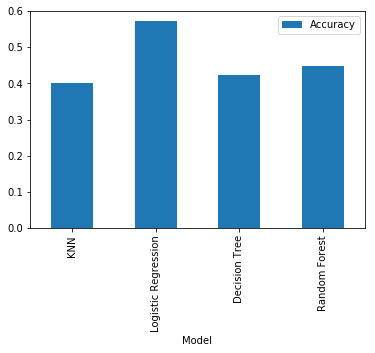

In [39]:
d = {'Model':['KNN','Logistic Regression','Decision Tree','Random Forest'],'Accuracy':[knn_score,scores.mean(),scores_dt.mean(),scores_rf.mean()]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')

In [40]:
msft_earnings = pd.read_csv('/Users/aamirsayani/Downloads/msft_earnings.csv')

msft_data = pd.read_csv('/Users/aamirsayani/Downloads/MSFT (1).csv')

In [41]:
def transform_stock_data(stock_data, ticker_data):

    stock_data.columns = [c.replace(' ', '_') for c in stock_data.columns]

    stock_data.fillna(0)

    clean_data = stock_data[:-1]

    clean_data['performance'] = np.where(clean_data['EPS']>= clean_data['Estimated_EPS'], 1, 0)

    clean_data["Date_Announced"] = pd.to_datetime(clean_data.Date_Announced)

    clean_data["Date_Announced"] = clean_data["Date_Announced"].dt.strftime('%Y-%m-%d')

    clean_data = clean_data.sort_values(by='Date_Announced')
    
    clean_data = clean_data.rename({'Date_Announced':'Date'}, axis=1)

    quarter_dates = clean_data['Date']

    clean_data['quarter'] = True 

    #ticker_data['Symbol'] = 'TSLA'

    combined_data = pd.concat([ticker_data, clean_data]).sort_values('Date').reset_index(drop=True)

    combined_data['difference'] =  combined_data['Close'] - combined_data['Open']
    
    combined_data['pos_day'] = combined_data['difference'].apply(lambda x: 1 if x > 0 else 0)

    combined_data[['quarter']] = combined_data[['quarter']].fillna(False)
    
    indexes = combined_data.loc[combined_data['quarter'] == True]

    my_sum = 0

    my_days_list = []
    my_pos_list = []

    for idx, val in enumerate(combined_data['quarter']):

        my_sum += 1

        if val == True:

            my_days_list.append(my_sum)

            my_sum = 0 


    for a,b in zip(combined_data.quarter, combined_data.pos_day):

        if a == False and b == 1:

            my_sum += 1

        if a == True:

            my_pos_list.append(my_sum)

            my_sum = 0 

    indexes.head()

    indexes_list = indexes.index.tolist()

    new_data = pd.DataFrame(indexes)

    new_data.head()
    
    new_data['days_in_quarter'] = my_days_list

    new_data['pos_days_in_quarter'] = my_pos_list

    new_data['percent_pos'] = new_data['pos_days_in_quarter'] / new_data['days_in_quarter']

    dates_after = []

    for i in quarter_dates:

        date = datetime.strptime(i, "%Y-%m-%d")

        modified_date = date + timedelta(days=1)

        #datetime.strftime(modified_date, "%Y-%m-%d")

        date = modified_date.date()

        date_string = date.strftime('%Y-%m-%d')

        dates_after.append(date_string)

    for i in dates_after:

        i = datetime.strptime(i, "%Y-%m-%d")
        
    #dates_after = dates_after[:-1]

    up_down = combined_data.loc[combined_data['Date'].isin(dates_after)]
    
    new_data = new_data[:-1]

    new_data['next_day'] = up_down['pos_day'].values
    
    new_data['volume'] = up_down['Volume'].values
    
    return(new_data)


In [42]:
new_msft_data = transform_stock_data(msft_earnings, msft_data)

/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [43]:
amzn_earnings = pd.read_csv('/Users/aamirsayani/Downloads/amzn_earnings.csv') 

nflx_earnings = pd.read_csv('/Users/aamirsayani/Downloads/netflix_earnings.csv')

aapl_earnings = pd.read_csv('/Users/aamirsayani/Downloads/aapl_earnings.csv')

amzn_data = pd.read_csv('/Users/aamirsayani/Downloads/AMZN.csv')

nflx_data = pd.read_csv('/Users/aamirsayani/Downloads/NFLX.csv')

aapl_data = pd.read_csv('/Users/aamirsayani/Downloads/AAPL.csv')

goog_data = pd.read_csv('/Users/aamirsayani/Downloads/GOOG.csv')

goog_earnings = pd.read_csv('/Users/aamirsayani/Downloads/goog_earnings.csv')

fb_data = pd.read_csv('/Users/aamirsayani/Downloads/FB.csv')

fb_earnings = pd.read_csv('/Users/aamirsayani/Downloads/fb_earnings.csv')


In [44]:
def transform_stock_data2(stock_data, ticker_data):

    stock_data.columns = [c.replace(' ', '_') for c in stock_data.columns]

    stock_data.fillna(0)

    clean_data = stock_data[:-1]

    clean_data['performance'] = np.where(clean_data['EPS']>= clean_data['Estimated_EPS'], 1, 0)

    clean_data["Date_Announced"] = pd.to_datetime(clean_data.Date_Announced)

    clean_data["Date_Announced"] = clean_data["Date_Announced"].dt.strftime('%Y-%m-%d')

    clean_data = clean_data.sort_values(by='Date_Announced')
    
    clean_data = clean_data.rename({'Date_Announced':'Date'}, axis=1)

    quarter_dates = clean_data['Date']

    clean_data['quarter'] = True 

    #ticker_data['Symbol'] = 'TSLA'

    combined_data = pd.concat([ticker_data, clean_data]).sort_values('Date').reset_index(drop=True)

    combined_data['difference'] =  combined_data['Close'] - combined_data['Open']
    
    combined_data['pos_day'] = combined_data['difference'].apply(lambda x: 1 if x > 0 else 0)

    combined_data[['quarter']] = combined_data[['quarter']].fillna(False)
    
    indexes = combined_data.loc[combined_data['quarter'] == True]

    my_sum = 0

    my_days_list = []
    my_pos_list = []

    for idx, val in enumerate(combined_data['quarter']):

        my_sum += 1

        if val == True:

            my_days_list.append(my_sum)

            my_sum = 0 


    for a,b in zip(combined_data.quarter, combined_data.pos_day):

        if a == False and b == 1:

            my_sum += 1

        if a == True:

            my_pos_list.append(my_sum)

            my_sum = 0 

    indexes.head()

    indexes_list = indexes.index.tolist()

    new_data = pd.DataFrame(indexes)

    new_data.head()
    
    new_data['days_in_quarter'] = my_days_list

    new_data['pos_days_in_quarter'] = my_pos_list

    new_data['percent_pos'] = new_data['pos_days_in_quarter'] / new_data['days_in_quarter']

    dates_after = []

    for i in quarter_dates:

        date = datetime.strptime(i, "%Y-%m-%d")

        modified_date = date + timedelta(days=1)

        #datetime.strftime(modified_date, "%Y-%m-%d")

        date = modified_date.date()

        date_string = date.strftime('%Y-%m-%d')

        dates_after.append(date_string)

    for i in dates_after:

        i = datetime.strptime(i, "%Y-%m-%d")
        
    #dates_after = dates_after[:-1]

    up_down = combined_data.loc[combined_data['Date'].isin(dates_after)]
    
    new_data = new_data[:-1]
    
    new_data = new_data.drop(new_data.index[11])
    
    new_data['next_day'] = up_down['pos_day'].values
    
    new_data['volume'] = up_down['Volume'].values
    
    return(new_data)


In [45]:
def transform_stock_data3(stock_data, ticker_data):

    stock_data.columns = [c.replace(' ', '_') for c in stock_data.columns]

    stock_data.fillna(0)

    clean_data = stock_data[:-1]

    clean_data['performance'] = np.where(clean_data['EPS']>= clean_data['Estimated_EPS'], 1, 0)

    clean_data["Date_Announced"] = pd.to_datetime(clean_data.Date_Announced)

    clean_data["Date_Announced"] = clean_data["Date_Announced"].dt.strftime('%Y-%m-%d')

    clean_data = clean_data.sort_values(by='Date_Announced')
    
    clean_data = clean_data.rename({'Date_Announced':'Date'}, axis=1)

    quarter_dates = clean_data['Date']

    clean_data['quarter'] = True 

    #ticker_data['Symbol'] = 'TSLA'

    combined_data = pd.concat([ticker_data, clean_data]).sort_values('Date').reset_index(drop=True)

    combined_data['difference'] =  combined_data['Close'] - combined_data['Open']
    
    combined_data['pos_day'] = combined_data['difference'].apply(lambda x: 1 if x > 0 else 0)

    combined_data[['quarter']] = combined_data[['quarter']].fillna(False)
    
    indexes = combined_data.loc[combined_data['quarter'] == True]

    my_sum = 0

    my_days_list = []
    my_pos_list = []

    for idx, val in enumerate(combined_data['quarter']):

        my_sum += 1

        if val == True:

            my_days_list.append(my_sum)

            my_sum = 0 


    for a,b in zip(combined_data.quarter, combined_data.pos_day):

        if a == False and b == 1:

            my_sum += 1

        if a == True:

            my_pos_list.append(my_sum)

            my_sum = 0 

    indexes.head()

    indexes_list = indexes.index.tolist()

    new_data = pd.DataFrame(indexes)

    new_data.head()
    
    new_data['days_in_quarter'] = my_days_list

    new_data['pos_days_in_quarter'] = my_pos_list

    new_data['percent_pos'] = new_data['pos_days_in_quarter'] / new_data['days_in_quarter']

    dates_after = []

    for i in quarter_dates:

        date = datetime.strptime(i, "%Y-%m-%d")

        modified_date = date + timedelta(days=1)

        #datetime.strftime(modified_date, "%Y-%m-%d")

        date = modified_date.date()

        date_string = date.strftime('%Y-%m-%d')

        dates_after.append(date_string)

    for i in dates_after:

        i = datetime.strptime(i, "%Y-%m-%d")
        
    #dates_after = dates_after[:-1]

    up_down = combined_data.loc[combined_data['Date'].isin(dates_after)]
    
    new_data = new_data[:-1]
    
    new_data = new_data[1:]

    new_data['next_day'] = up_down['pos_day'].values
    
    new_data['volume'] = up_down['Volume'].values
    
    return(new_data)


In [46]:
new_amzn_data = transform_stock_data2(amzn_earnings, amzn_data)

new_amzn_data.head()

/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Date,Open,High,Low,Close,Adj Close,Volume,Timeframe,Name,Symbol,...,Surprise_%_Revenue,performance,quarter,difference,pos_day,days_in_quarter,pos_days_in_quarter,percent_pos,next_day,volume
142,2012-07-26,NaN,NaN,NaN,NaN,NaN,NaN,After Market Close,Amazon.com,AMZN,...,-0.465477,0.0,True,NaN,0,143,80,0.559441,1,11313900.0
207,2012-10-25,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Amazon.com,AMZN,...,-0.790230,0.0,True,NaN,0,65,28,0.430769,1,11367500.0
271,2013-01-29,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Amazon.com,AMZN,...,-4.355635,0.0,True,NaN,0,64,36,0.562500,0,13075400.0
331,2013-04-25,NaN,NaN,NaN,NaN,NaN,NaN,After Market Close,Amazon.com,AMZN,...,-0.556931,1.0,True,NaN,0,60,26,0.433333,0,14030000.0
396,2013-07-25,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Amazon.com,AMZN,...,-0.254130,0.0,True,NaN,0,65,39,0.600000,1,8817500.0


In [47]:
new_nflx_data = transform_stock_data(nflx_earnings, nflx_data)

new_nflx_data.head()

/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Date,Open,High,Low,Close,Adj Close,Volume,Timeframe,Name,Symbol,...,Surprise_%_Revenue,performance,quarter,difference,pos_day,days_in_quarter,pos_days_in_quarter,percent_pos,next_day,volume
76,2012-04-23,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Netflix,NFLX,...,NaN,0.0,True,NaN,0,77,37,0.480519,1,117393500.0
141,2012-07-24,NaN,NaN,NaN,NaN,NaN,NaN,After Market Close,Netflix,NFLX,...,0.011250,1.0,True,NaN,0,65,26,0.400000,0,173470500.0
208,2012-10-24,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Netflix,NFLX,...,0.012156,1.0,True,NaN,0,67,32,0.477612,1,33046300.0
268,2013-01-23,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Netflix,NFLX,...,1.164733,1.0,True,NaN,0,60,28,0.466667,1,118805400.0
329,2013-04-22,NaN,NaN,NaN,NaN,NaN,NaN,Before Market Open,Netflix,NFLX,...,NaN,1.0,True,NaN,0,61,29,0.475410,1,114860900.0


In [48]:
new_aapl_data = transform_stock_data(aapl_earnings, aapl_data)

new_goog_data = transform_stock_data(goog_earnings, goog_data)

new_fb_data = transform_stock_data3(fb_earnings, fb_data)

/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [49]:
new_tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Timeframe,Name,...,Surprise_%_Revenue,performance,quarter,difference,pos_day,days_in_quarter,pos_days_in_quarter,percent_pos,next_day,volume
141,2012-07-25,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,-11.908646,1.0,True,NaN,0,142,88,0.619718,0,11311500.0
212,2012-11-05,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,3.541106,1.0,True,NaN,0,71,30,0.422535,1,11620000.0
286,2013-02-20,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,After Market Close,Tesla,...,-0.032669,0.0,True,NaN,0,74,42,0.567568,0,45189000.0
341,2013-05-08,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,14.222999,1.0,True,NaN,0,55,29,0.527273,0,143025000.0
405,2013-08-07,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,Before Market Open,Tesla,...,2.913608,1.0,True,NaN,0,64,35,0.546875,0,136234000.0


In [50]:
pdList = [new_tesla_data, new_msft_data, new_nflx_data, new_aapl_data, new_amzn_data, new_fb_data, new_goog_data]  # List of your dataframes

new_df = pd.concat(pdList, ignore_index=True, sort=False)

In [51]:
#new_df.to_csv('/Users/aamirsayani/Downloads/final_ml_data.csv')

In [52]:
final_data_set = new_df.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'difference'], axis=1)

In [53]:
final_data_set.tail()

,Date,Symbol,Timeframe,Name,Period,Confirmed_Date,EPS,Estimated_EPS,Surprise_%_EPS,Revenue,Estimated_Revenue,Surprise_%_Revenue,performance,quarter,pos_day,days_in_quarter,pos_days_in_quarter,percent_pos,next_day,volume
238,2019-10-28,GOOG,After Market Close,Alphabet,Q3,Confirmed,10.12,12.42,-18.518519,4.049900e+10,4.029000e+10,0.518739,0.0,True,0,67,35,0.522388,0,1886400.0
239,2020-02-03,GOOG,After Market Close,Alphabet,Q4,Confirmed,15.35,12.61,21.728787,4.607500e+10,4.692000e+10,-1.800938,1.0,True,0,66,35,0.530303,0,3933000.0
240,2020-04-28,GOOG,After Market Close,Alphabet,Q1,Confirmed,9.87,10.38,-4.913295,4.115900e+10,4.033000e+10,2.055542,0.0,True,0,61,32,0.524590,1,3793600.0
241,2020-07-30,GOOG,After Market Close,Alphabet,Q2,Confirmed,10.13,8.34,21.462830,3.829700e+10,3.736000e+10,2.508030,1.0,True,0,66,42,0.636364,0,3439900.0
242,2020-10-29,GOOG,After Market Close,Alphabet,Q3,Confirmed,16.40,11.21,46.297948,4.617300e+10,4.288000e+10,7.679571,1.0,True,0,65,32,0.492308,0,4329100.0


In [54]:
ml_data = final_data_set.drop(['Symbol', 'Name', 'Confirmed_Date', 'EPS', 'Surprise_%_EPS', 'Revenue', 
                              'Surprise_%_Revenue', 'quarter', 'pos_day'], axis=1)

#(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'difference'], axis=1)

In [55]:
final_data_set2 = final_data_set

final_data_set2 = final_data_set2.sort_values('Date').reset_index(drop=True)

final_data_set2.head()

final_data_set2.to_csv('/Users/aamirsayani/Downloads/lets_see3.csv')

In [56]:
#final_data_set = final_data_set.drop(final_data_set.iloc[8])

ml_data = ml_data.dropna(how='any',axis=0) 

#ml_data.to_csv('/Users/aamirsayani/Downloads/final_ml_data.csv')

ml_data.tail()

,Date,Timeframe,Period,Estimated_EPS,Estimated_Revenue,performance,days_in_quarter,pos_days_in_quarter,percent_pos,next_day,volume
238,2019-10-28,After Market Close,Q3,12.42,4.029000e+10,0.0,67,35,0.522388,0,1886400.0
239,2020-02-03,After Market Close,Q4,12.61,4.692000e+10,1.0,66,35,0.530303,0,3933000.0
240,2020-04-28,After Market Close,Q1,10.38,4.033000e+10,0.0,61,32,0.524590,1,3793600.0
241,2020-07-30,After Market Close,Q2,8.34,3.736000e+10,1.0,66,42,0.636364,0,3439900.0
242,2020-10-29,After Market Close,Q3,11.21,4.288000e+10,1.0,65,32,0.492308,0,4329100.0


/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


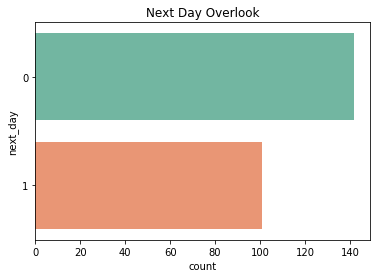

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y ='next_day', data = final_data_set, palette = "Set2").set_title('Next Day Overlook')
 
plt.show()

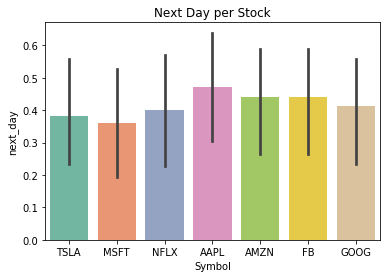

In [58]:
sns.barplot(x ='Symbol', y = "next_day", data = final_data_set, palette = "Set2").set_title('Next Day per Stock')
 
plt.show()

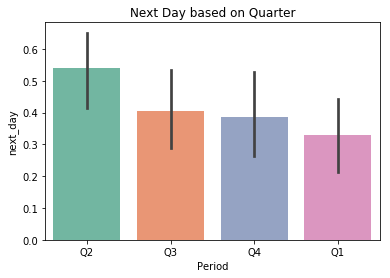

In [59]:
sns.barplot(x = 'Period', y = 'next_day', data = final_data_set, palette="Set2").set_title('Next Day based on Quarter')

plt.show()

Text(0.5,1,'Next Day based on Quarter')

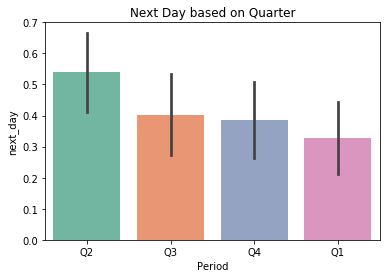

In [60]:
sns.barplot(x = 'Period', y = 'next_day', data = final_data_set, palette="Set2").set_title('Next Day based on Quarter')


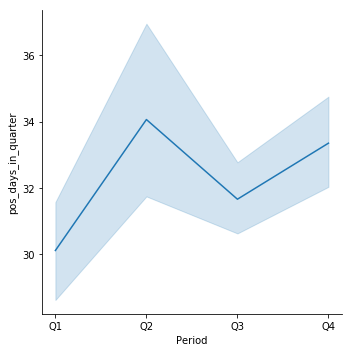

In [61]:
sns.relplot(x="Period", y="pos_days_in_quarter", data=final_data_set, kind="line", palette = "Set2")

plt.show()

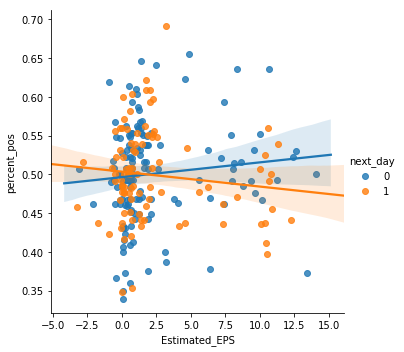

In [62]:
#sns.lmplot(x='Estimated_Revenue', y='pos_days_in_quarter', data=final_data_set);

from sklearn.preprocessing import StandardScaler

final_data_set3 = final_data_set

final_data_set3['size2'] = scaler.fit_transform(final_data_set3[["pos_days_in_quarter"]])

final_data_set3['size3'] = scaler.fit_transform(final_data_set3[["volume"]])

sns.lmplot(x='Estimated_EPS', y='percent_pos', hue='next_day', data=final_data_set3);


plt.show()

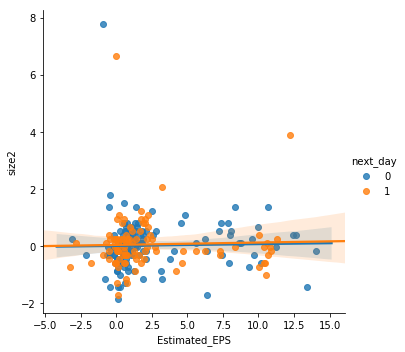

In [63]:
#sns.lmplot(x='Estimated_Revenue', y='pos_days_in_quarter', hue='Symbol', data=final_data_set, fit_reg=False);

sns.lmplot(x='Estimated_EPS', y='size2', hue='next_day', data=final_data_set3);


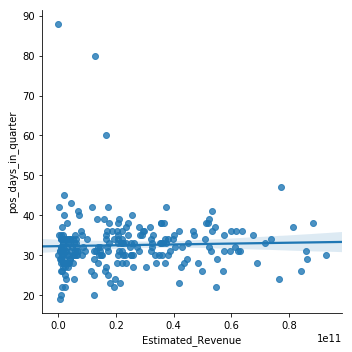

In [64]:
sns.lmplot(x='Estimated_Revenue', y='pos_days_in_quarter', data=final_data_set);

plt.show()

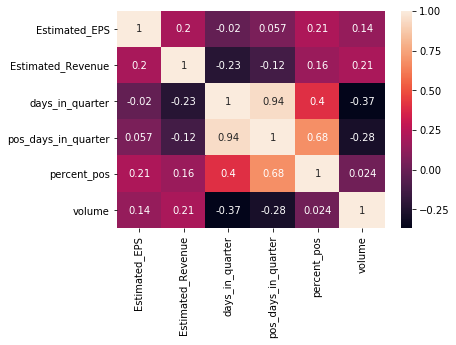

In [65]:
features_chosen = ['Estimated_Revenue', 'Estimated_EPS', 'percent_pos', 'pos_days_in_quarter', 'Timeframe', 'Period', 'size2', 'size3']

X3 = final_data_set3[features_chosen]

sns.heatmap(X.corr(), annot=True)

plt.show()

In [66]:
# Y = df['next_day'].values

# Y = final_data_set['next_day'].values

ml_data.head()

ml_data2 = ml_data.sort_values('Estimated_EPS').reset_index(drop=True) 

new = ml_data.drop(['next_day','Date', 'days_in_quarter', 'performance'], axis=1)

#new = new.Timeframe.map(dict(Before Market Open=1, After Market Close=0))

new['Timeframe'] = new['Timeframe'].map({'Before Market Open': 0, 'After Market Close': 1})

new = pd.get_dummies(new, columns=["Period"])

#new = new.drop(['Period_Q1', 'Period_Q2', 'Period_Q3'], axis=1)

#new = new.drop(['Timeframe'], axis=1)

new.head()

#new = final_data_set.drop([''])

,Timeframe,Estimated_EPS,Estimated_Revenue,pos_days_in_quarter,percent_pos,volume,Period_Q1,Period_Q2,Period_Q3,Period_Q4
0,0,-0.93,30650000.0,88,0.619718,11311500.0,0,1,0,0
1,0,-0.92,48290000.0,30,0.422535,11620000.0,0,0,1,0
2,1,-0.53,306100000.0,42,0.567568,45189000.0,0,0,0,1
3,0,0.04,492020000.0,29,0.527273,143025000.0,1,0,0,0
4,0,-0.17,393670000.0,35,0.546875,136234000.0,0,1,0,0


In [67]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#new['SIZE'] = scaler.fit_transform(new[["Estimated_Revenue"]])

new['size3'] = scaler.fit_transform(new[["volume"]])

new['size2'] = scaler.fit_transform(new[["pos_days_in_quarter"]])

new = new.drop(['pos_days_in_quarter'], axis=1)

new.head()


,Timeframe,Estimated_EPS,Estimated_Revenue,percent_pos,volume,Period_Q1,Period_Q2,Period_Q3,Period_Q4,size3,size2
0,0,-0.93,30650000.0,0.619718,11311500.0,0,1,0,0,0.006460,1.000000
1,0,-0.92,48290000.0,0.422535,11620000.0,0,0,1,0,0.006672,0.159420
2,1,-0.53,306100000.0,0.567568,45189000.0,0,0,0,1,0.029680,0.333333
3,0,0.04,492020000.0,0.527273,143025000.0,1,0,0,0,0.096739,0.144928
4,0,-0.17,393670000.0,0.546875,136234000.0,0,1,0,0,0.092084,0.231884


In [68]:
from sklearn.ensemble import RandomForestRegressor
X = new
X = new.select_dtypes(exclude=[object])
#Y = ml_data['next_day'].values
Y = ml_data['next_day'].values

model = RandomForestRegressor(n_estimators=10,max_depth=40)
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [69]:
X.tail()

,Timeframe,Estimated_EPS,Estimated_Revenue,percent_pos,volume,Period_Q1,Period_Q2,Period_Q3,Period_Q4,size3,size2
238,1,12.42,4.029000e+10,0.522388,1886400.0,0,0,1,0,0.000000,0.231884
239,1,12.61,4.692000e+10,0.530303,3933000.0,0,0,0,1,0.001403,0.231884
240,1,10.38,4.033000e+10,0.524590,3793600.0,1,0,0,0,0.001307,0.188406
241,1,8.34,3.736000e+10,0.636364,3439900.0,0,1,0,0,0.001065,0.333333
242,1,11.21,4.288000e+10,0.492308,4329100.0,0,0,1,0,0.001674,0.188406


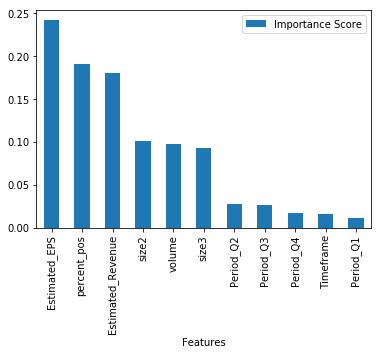

In [70]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.plot(x='Features',y='Importance Score',kind='bar')

#plt.show()

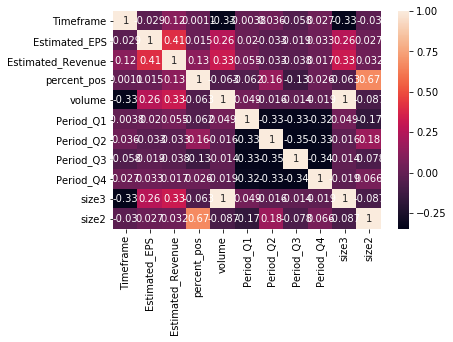

In [71]:
features_chosen = ['Estimated_Revenue', 'Estimated_EPS', 'percent_pos', 'pos_days_in_quarter', 'Timeframe', 'Period', 'volume']

X2 = ml_data[features_chosen]

sns.heatmap(X.corr(), annot=True)

plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

#K-Neighbors Regressor

from sklearn import neighbors
X = new
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = ml_data['next_day'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_regressor.fit(trainX,trainY)
knn_regressor.predict(testX)
knn_regressor.score(testX,testY)

-0.44685714285714306

In [86]:
#KNN

X = new
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = ml_data['next_day'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(trainX,trainY)

knn.predict(testX)
knn_score = knn.score(testX,testY)
knn_score

lr_score = metrics.accuracy_score(testY, predicted)
print(f"Accuracy score = {lr_score}")
print(f"ROC AUC Score = {roc_auc_score(testY, probs[:,1])}")
print("===================================================")
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, predicted))
print("===================================================")
print(metrics.classification_report(testY, predicted))

Accuracy score = 0.5857142857142857
ROC AUC Score = 0.4791859389454209
Confusion Matrix
[[37 10]
 [19  4]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        47
           1       0.29      0.17      0.22        23

    accuracy                           0.59        70
   macro avg       0.47      0.48      0.47        70
weighted avg       0.54      0.59      0.55        70



In [74]:
#Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

lr = LogisticRegression()
lr.fit(trainX,trainY)

predicted = lr.predict(testX)
probs = lr.predict_proba(testX)
lr_score = metrics.accuracy_score(testY, predicted)
print(f"Accuracy score = {lr_score}")
print(f"ROC AUC Score = {roc_auc_score(testY, probs[:,1])}")
print("===================================================")
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, predicted))
print("===================================================")
print(metrics.classification_report(testY, predicted))

Accuracy score = 0.5142857142857142
ROC AUC Score = 0.48848684210526316
Confusion Matrix
[[30  8]
 [26  6]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        38
           1       0.43      0.19      0.26        32

    accuracy                           0.51        70
   macro avg       0.48      0.49      0.45        70
weighted avg       0.49      0.51      0.47        70



/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_top_5_features, Y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.5106383  0.59574468 0.5106383  0.58695652 0.58695652]
0.558186864014801


/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aamirsayani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

In [76]:
#Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_top_5_features,Y)
scores_dt = cross_val_score(model_dt,X_top_5_features,Y,scoring='accuracy',cv=5)
print(scores_dt)
print(scores_dt.mean())

y_pred = cross_val_predict(model_rf,X_top_5_features,Y,cv=5)

print(metrics.classification_report(Y, y_pred))

[0.57446809 0.46808511 0.57446809 0.63043478 0.36956522]
0.5234042553191489
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       138
           1       0.43      0.45      0.44        95

    accuracy                           0.53       233
   macro avg       0.52      0.52      0.52       233
weighted avg       0.54      0.53      0.53       233



In [77]:
dt_f1_scores = cross_val_score(model_dt,X_top_5_features,Y,scoring='f1',cv=5)
print(dt_f1_scores)
print(dt_f1_scores.mean())

[0.53846154 0.30769231 0.64       0.51428571 0.3255814 ]
0.4652041911576796


In [78]:
dt_roc_scores = cross_val_score(model_dt,X_top_5_features,Y,scoring='roc_auc',cv=5)
print(dt_roc_scores)
print(dt_roc_scores.mean())

[0.58458647 0.42575188 0.59116541 0.5994152  0.44834308]
0.5298524087997772


In [87]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=15)
model_rf.fit(X_top_5_features,Y)

scores_rf = cross_val_score(model_rf,X_top_5_features,Y,scoring='accuracy',cv=5)
print(scores_rf)
print(scores_rf.mean())

y_pred = cross_val_predict(model_rf,X_top_5_features,Y,cv=5)

lr_score = metrics.accuracy_score(testY, predicted)
print(f"Accuracy score = {lr_score}")
print(f"ROC AUC Score = {roc_auc_score(testY, probs[:,1])}")
print("===================================================")
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, predicted))
print("===================================================")
print(metrics.classification_report(testY, predicted))

[0.46808511 0.4893617  0.61702128 0.58695652 0.54347826]
0.5409805735430157
Accuracy score = 0.5857142857142857
ROC AUC Score = 0.4791859389454209
Confusion Matrix
[[37 10]
 [19  4]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        47
           1       0.29      0.17      0.22        23

    accuracy                           0.59        70
   macro avg       0.47      0.48      0.47        70
weighted avg       0.54      0.59      0.55        70



In [80]:
rf_f1_scores = cross_val_score(model_rf,X_top_5_features,Y,scoring='f1',cv=5)
print(rf_f1_scores)
print(rf_f1_scores.mean())

[0.44444444 0.28571429 0.08       0.57777778 0.41860465]
0.3613082318198597


In [81]:
rf_roc_scores = cross_val_score(model_rf,X_top_5_features,Y,scoring='roc_auc',cv=5)
print(rf_roc_scores.mean())

0.5150584795321638


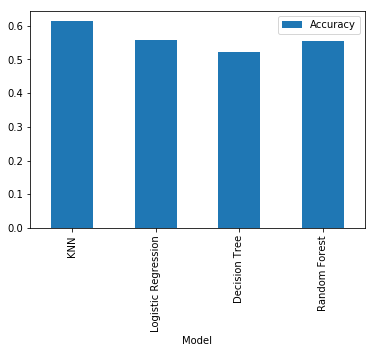

In [82]:
d = {'Model':['KNN','Logistic Regression','Decision Tree','Random Forest'],'Accuracy':[knn_score,scores.mean(),scores_dt.mean(),scores_rf.mean()]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')

In [83]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_rf,X_top_5_features,Y,cv=5)

print(metrics.confusion_matrix(Y,y_pred))

[[75 63]
 [52 43]]


In [84]:
print(metrics.classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.54      0.57       138
           1       0.41      0.45      0.43        95

    accuracy                           0.51       233
   macro avg       0.50      0.50      0.50       233
weighted avg       0.52      0.51      0.51       233



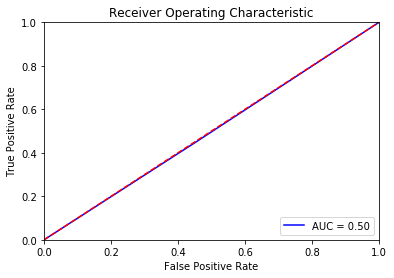

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y,y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
